# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [95]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [96]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [97]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [98]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [100]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

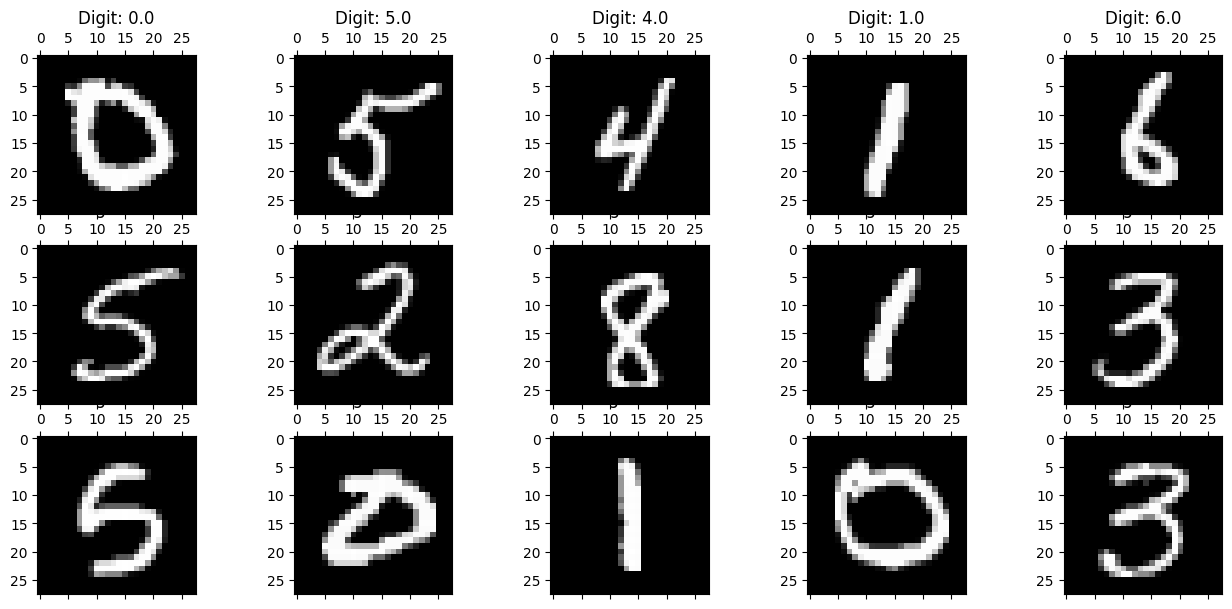

In [101]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [103]:
# PCA를 진행하기 위해 train data scaling 먼저 진행
# train set은 fit 진행 후 transform
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

# test set은 transfrom만 진행
X_test_std = scaler.transform(X_test)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

#### `주성분 개수 결정`

1. `Elbow piont : 곡선의 기울기가 급격히 감소하는 지점`
2. Kaiser's Rule : 고유값 1이상의 주성분들
3. `누적 설명률이 70~80 이상인 지점`

In [104]:
from sklearn.decomposition import PCA

# 누적 설명률 판단

pca = PCA(n_components= 0.8)
pca.fit(X_train_std)
pca.n_components_


145

In [105]:
pca = PCA(n_components=0.75)
pca.fit(X_train_std)
pca.n_components_

118

`스케일링을 한 데이터의 주성분은 118개가 적당하고 판단`

In [106]:
# 엘보우 포인트 판단

pca = PCA()
X_pca = pca.fit_transform(X_train_std)

exp_var_ratio = pca.explained_variance_ratio_

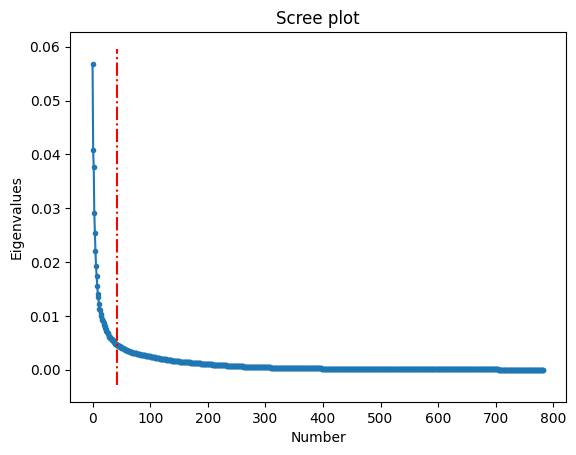

In [107]:
# Scree plot 그리기

plt.plot(range(len(exp_var_ratio)), exp_var_ratio, marker = '.')
plt.title("Scree plot")
plt.xlabel("Number")
plt.ylabel("Eigenvalues")

#kneelocater 이용 -> elbow point 찾기
from kneed import KneeLocator

kn = KneeLocator(range(len(exp_var_ratio)), exp_var_ratio, curve = 'convex', direction = 'decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles= 'dashdot', colors='r')

plt.show()

In [108]:
print("Elbow Point :", kn.knee) # 엘보우 포인트 확인

Elbow Point : 42


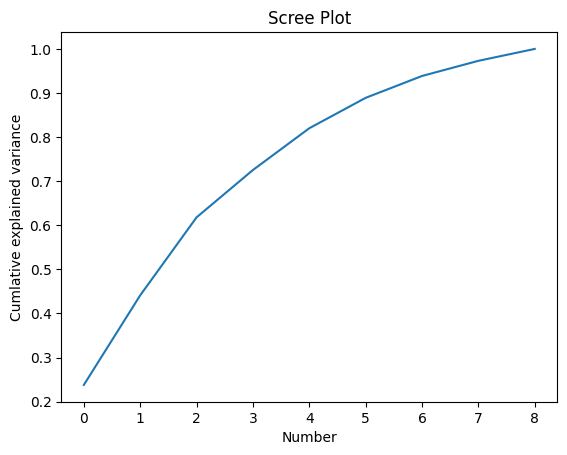

In [109]:
# LDA 이용
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA - 지도학습(분류)이므로 fit 할 때 y_train도 같이 학습
# 따라서 y_train 학습 시 1차원 배열 형태로 학습 시킴 (np.ravel 이용)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_std, np.ravel(y_train))
X_test_lda = lda.transform(X_test)

# 분산 비율
var_ratio = lda.explained_variance_ratio_

# SCree plot 그리기
plt.plot(np.cumsum(var_ratio))
plt.xlabel("Number")
plt.ylabel("Cumlative explained variance")
plt.title("Scree Plot")
plt.show()

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [110]:
# Random Forest 사용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import time

rf = RandomForestClassifier(random_state=0)

start = time.time()
rf.fit(X_train, y_train)
end = time.time()
pred = rf.predict(X_test)

print(f"정확도 평가 : {accuracy_score(pred, y_test)}")
print(f"소요시간 : {end-start}")

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


정확도 평가 : 0.9682142857142857
소요시간 : 45.300044775009155


In [111]:
# pca에 대한 데이터로 학습 진행
rf = RandomForestClassifier(random_state=0)

start = time.time()
rf.fit(X_train, y_train)
end = time.time()
pred = rf.predict(X_test_std)

print(f"정확도 평가 : {accuracy_score(pred, y_test)}")
print(f"소요시간 : {end-start}")

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


정확도 평가 : 0.4007857142857143
소요시간 : 46.34465026855469


`원본 데이터로 학습을 진행했을 때와 pca 데이터로 학습을 진행했을 때 정확도에서 큰 차이가 있음을 확인할 수 있다.`

특정한 틀 없이 자유롭게 해주시면 됩니다!